<div class="alert alert-block alert-info"><b></b>
<h1><center> <font color='black'> Homework 05  </font></center></h1>
<h2><center> <font color='black'> A/B Testing &  Uplift modelling </font></center></h2>
<h2><center> <font color='black'> Due date : 10 May 23:59 </font></center></h2>    
<h2><center> <font color='black'> BDA - University of Tartu - Spring 2020</font></center></h3>
</div>

# Homework Instructions

- Insert your team member names and student IDs in the field "Team mates" below. If you are not working in a team please insert only your name, surname and student ID 

- The accepted submission formats are Colab links or .ipynb files. If you are submitting Colab links please make sure that the privacy settings for the file is public so we can access your code. 

- The submission will automatically close at 12:00 am, so please make sure you have enough time to submit the homework. 

- Only one of the teammates should submit the homework. We will grade and give points to both of you! 

- You do not necessarily need to work on Colab. Especially as the size and the complexity of datasets will increase through the course, you can install jupyter notebooks locally and work from there.

- If you do not understand what a question is asking for, please ask in Moodle. 

**<h2><font color='red'>Team mates:</font></h2>**

<font color='red'>Name Surname: Enlik -</font>&emsp;   <font color='red'>Student ID: B96323</font>

<font color='red'>Name Surname: Thi Thuy Nga Vu</font>&emsp;   <font color='red'>Student ID: B88416</font>

# 1. A/B Testing (4 points)


**1.1 Use `AB_clicks.csv` data and find whether Learn, Help, and Services versions of the page compared to the Interact have significantly more (or less) clicks. Justify the choice of the performed tests and interpret the result of the test. (1.5 points)** 




In [20]:
# Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt # For creating plots
%matplotlib inline 

#Let's make this notebook reproducible
np.random.seed(100)

# set plot style for all plots
plt.style.use('ggplot')

In [21]:
df  = pd.read_csv('AB_clicks.csv', sep='\t')
df.head(100)

,Element_ID,Tag_name,Name,No_clicks,Visible,Version
0,128,area,Montana State University - Home,1291,False,Interact
1,69,a,FIND,842,True,Interact
2,61,input,s.q,508,True,Interact
3,67,a,lib.montana.edu/find/,166,True,Interact
4,78,a,REQUEST,151,True,Interact
...,...,...,...,...,...,...
95,15,div,"Explore the world, explore the past Science & ...",3,True,Connect
96,47,span,nav-item-dot,3,True,Connect
97,49,a,nav-item,3,True,Connect
98,65,form,Search,3,True,Connect


In [22]:
# df['Version'].unique()

In [23]:
# check for missing values or unclean data
# df.isnull().sum()

In [24]:
# df.info()

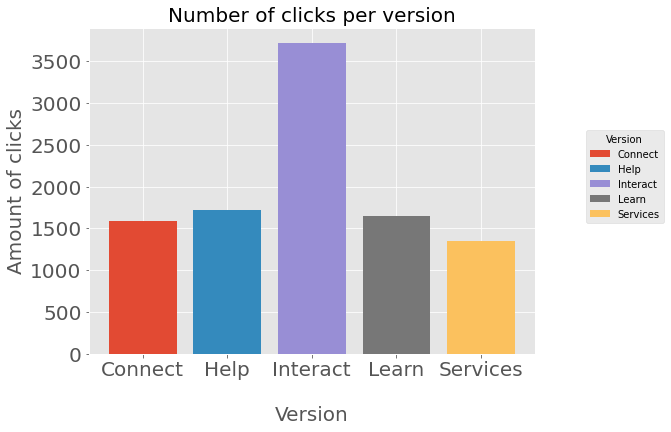

In [25]:
# group data by Version
groups = df.groupby('Version')

# Plot 
fig, ax = plt.subplots(figsize=(8, 6))

clicks =[] # clicks for each version
# plot line for each customer 
for Version, group in groups:
    ax.bar(group.Version, sum(group.No_clicks), label=Version)
    clicks.append(sum(group.No_clicks))

# Make our graph cool, and understandable

# put the legend outside the graph
ax.legend(bbox_to_anchor=(1.3, 0.7), title="Version",)

# set titles for figure, x, y
plt.title('Number of clicks per version',fontsize=20)
plt.xlabel('\nVersion', fontsize=20)
plt.ylabel('Amount of clicks',fontsize=20)


plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 
plt.grid(True)
plt.show()

In [26]:
clicks = []
for Version,group in groups:
    clicks.append(sum(group.No_clicks))
    print(f"no of clicks in version: {Version} is {sum(group.No_clicks)}")
    
clicks

no of clicks in version: Connect is 1587
no of clicks in version: Help is 1717
no of clicks in version: Interact is 3714
no of clicks in version: Learn is 1652
no of clicks in version: Services is 1348


[1587, 1717, 3714, 1652, 1348]

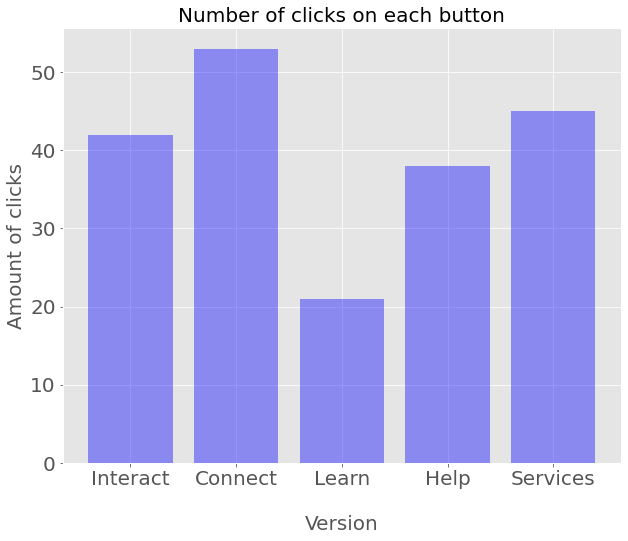

In [27]:
# filter our data based on buttons name
btn_names = ["INTERACT", "LEARN", "CONNECT", "HELP", "SERVICES"] # btn Interact with different names 

newdf = df[df['Name'].isin(btn_names)] # filter data based on btn names 

# Plot
fig, ax = plt.subplots(figsize=(10, 8))

ax.bar(newdf.Version, newdf.No_clicks, color='b', alpha = 0.4)
    
# set titles for figure, x, y
plt.title('Number of clicks on each button',fontsize=20)
plt.xlabel('\nVersion', fontsize=20)
plt.ylabel('Amount of clicks',fontsize=20)

plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 
plt.grid(True)
plt.show()

### Task
find whether Learn, Help, and Services versions of the page compared to the Interact have significantly more (or less) clicks

### What is our hypothesis?

1. **Null hypothesis $(H_0)$:** There is no difference between version `A: Interact` and version `B: Learn|Help|Services`.

2. **Alternative hupothesis $(H_a)$** there is a difference between version `A: Interact` and version `B: Learn|Help|Services`.

In [28]:
# use t-test -> compare two average(means) between two versions

# filter data by Tag_name == area
# df_filter = df_cleaned
df_filter =  df['Tag_name']!='area'
df_filter = df[df_filter]
df_filter

,Element_ID,Tag_name,Name,No_clicks,Visible,Version
1,69,a,FIND,842,True,Interact
2,61,input,s.q,508,True,Interact
3,67,a,lib.montana.edu/find/,166,True,Interact
4,78,a,REQUEST,151,True,Interact
5,98,a,Hours,102,True,Interact
...,...,...,...,...,...,...
294,116,div,Â© MSU About MSU Library Accessibility Contact...,1,True,Services
295,130,div,lib.montana.edu/interact/,1,False,Services
296,131,center,lib.montana.edu/hours/,1,False,Services
297,132,font,ì§€ì €ê·€ë‹¤,1,False,Services


In [29]:
# get only data about our two version Interact, and Learn
df_interact_learn = (df_filter['Version']=='Interact') | (df_filter['Version']=='Learn')
df_interact_learn = df_filter[df_interact_learn]

# get only data about our two version Interact, and Help
df_interact_help = (df_filter['Version']=='Interact') | (df_filter['Version']=='Help')
df_interact_help = df_filter[df_interact_help]

# get only data about our two version Interact, and Services
df_interact_services = (df_filter['Version']=='Interact') | (df_filter['Version']=='Services')
df_interact_services = df_filter[df_interact_services]

# df_interact_learn.head(100)
# df_interact_help.head(100)
# df_interact_services.head(100)

In [30]:
# Library

from plotly.figure_factory import create_table as ct

# to get different test statistics in python 
from scipy import stats
import scipy

In [37]:
# Learn compared to Interact
sample1_interact = df_interact_learn[df_interact_learn['Version']=='Interact']
sample2_learn = df_interact_learn[df_interact_learn['Version']=='Learn']

twosample_results = stats.ttest_ind(sample1_interact['No_clicks'], sample2_learn['No_clicks'])

if twosample_results[1] < 0.05: 
    s = "Reject the Null Hypothesis"# p-value < alpha (L.S)
else:
    s = "Accept the Null Hypothesis"# p-value > alpha (L.S)

matrix_twosample = [
    ['', 'Test Statistic', 'p-value', 'comment'],
    ['Sample#2 Data', twosample_results[0], twosample_results[1], s]
]

twosample_table = ct(matrix_twosample, index=True)
twosample_table

### Interpretation of the result

- Because the p-value greater than alpha value, we should accept null hypothesis(H0)
- That means **there is no difference between version A: Interact and version B: Learn** as described in our H0

In [38]:
# Help compared to Interact
sample1_interact = df_interact_help[df_interact_help['Version']=='Interact']
sample2_help = df_interact_help[df_interact_help['Version']=='Help']

twosample_results = stats.ttest_ind(sample1_interact['No_clicks'], sample2_help['No_clicks'])

if twosample_results[1] < 0.05: 
    s = "Reject the Null Hypothesis"# p-value < alpha (L.S)
else:
    s = "Accept the Null Hypothesis"# p-value > alpha (L.S)

matrix_twosample = [
    ['', 'Test Statistic', 'p-value', 'comment'],
    ['Sample#2 Data', twosample_results[0], twosample_results[1], s]
]

twosample_table = ct(matrix_twosample, index=True)
twosample_table

### Interpretation of the result

- Because the p-value greater than alpha value, we should accept null hypothesis(H0)
- That means **there is no difference between version A: Interact and version B: Help** as described in our H0

In [39]:
# Services compared to Interact
sample1_interact = df_interact_services[df_interact_services['Version']=='Interact']
sample2_services = df_interact_services[df_interact_services['Version']=='Services']

twosample_results = stats.ttest_ind(sample1_interact['No_clicks'], sample2_services['No_clicks'])

if twosample_results[1] < 0.05: 
    s = "Reject the Null Hypothesis"# p-value < alpha (L.S)
else:
    s = "Accept the Null Hypothesis"# p-value > alpha (L.S)

matrix_twosample = [
    ['', 'Test Statistic', 'p-value', 'comment'],
    ['Sample#2 Data', twosample_results[0], twosample_results[1], s]
]

twosample_table = ct(matrix_twosample, index=True)
twosample_table

### Interpretation of the result

- Because the p-value greater than alpha value, we should accept null hypothesis(H0)
- That means **there is no difference between version A: Interact and version B: Services**

In [40]:
# Use Statistic Model
import numpy as np, statsmodels.stats.api as sms

In [41]:
# Learn
cm = sms.CompareMeans(sms.DescrStatsW(sample2_learn['No_clicks']), sms.DescrStatsW(sample1_interact['No_clicks']))
print (f"95 percent confidence interval:\n{cm.tconfint_diff(usevar='unequal')}\n")
       
       
print(f"Sample esitimate:\nmean in group Connect: {sample2_learn['No_clicks'].mean()}\nmean in group Interact:\
      {sample1_interact['No_clicks'].mean()}")

95 percent confidence interval:
(-46.10735800182992, 26.285275070296652)

Sample esitimate:
mean in group Connect: 25.721311475409838
mean in group Interac:      35.63235294117647


In [42]:
# Help
cm = sms.CompareMeans(sms.DescrStatsW(sample2_help['No_clicks']), sms.DescrStatsW(sample1_interact['No_clicks']))
print (f"95 percent confidence interval:\n{cm.tconfint_diff(usevar='unequal')}\n")
       
       
print(f"Sample esitimate:\nmean in group Connect: {sample2_help['No_clicks'].mean()}\nmean in group Interact:\
      {sample1_interact['No_clicks'].mean()}")

95 percent confidence interval:
(-45.80059879057906, 31.50017862251183)

Sample esitimate:
mean in group Connect: 28.482142857142858
mean in group Interac:      35.63235294117647


In [44]:
# Services
cm = sms.CompareMeans(sms.DescrStatsW(sample2_services['No_clicks']), sms.DescrStatsW(sample1_interact['No_clicks']))
print (f"95 percent confidence interval:\n{cm.tconfint_diff(usevar='unequal')}\n")
       
       
print(f"Sample esitimate:\nmean in group Connect: {sample2_services['No_clicks'].mean()}\nmean in group Interact:\
      {sample1_interact['No_clicks'].mean()}")

95 percent confidence interval:
(-45.57707263079783, 24.27390520998335)

Sample esitimate:
mean in group Connect: 24.98076923076923
mean in group Interac:      35.63235294117647


<font color='red'> **Answer:** </font>
    
- We accept the Null Hypothesis
- And yes,there is a difference between `Learn`, `Help`, and `Services` compared to `Interact`


**1.2 Use two different methods to test the normality of two different versions of your choice (Connect, Help, Services,..) (1.5 points)**

Text(0.5, 1.0, 'Distribution of No_clicks')

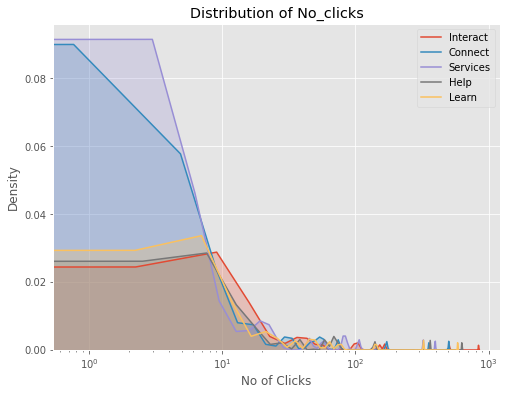

In [47]:
# Check the distribution of the data
fig, ax = plt.subplots(figsize=(8, 6))

ax = sns.kdeplot(df_filter.No_clicks[(df_filter["Version"] == 'Interact') ],
                 shade = True)
ax = sns.kdeplot(df_filter.No_clicks[(df_filter["Version"] == 'Connect') ],
                ax =ax,  shade= True)
ax = sns.kdeplot(df_filter.No_clicks[(df_filter["Version"] == 'Services') ],
                 shade = True)
ax = sns.kdeplot(df_filter.No_clicks[(df_filter["Version"] == 'Help') ],
                ax =ax,  shade= True)
ax = sns.kdeplot(df_filter.No_clicks[(df_filter["Version"] == 'Learn') ],
                ax =ax,  shade= True)

ax.legend(["Interact","Connect", "Services", "Help", "Learn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('No of Clicks')
ax.set_xscale('log') # we apply log-scale to get more clear information about the distribution of the data
ax.set_title('Distribution of No_clicks')

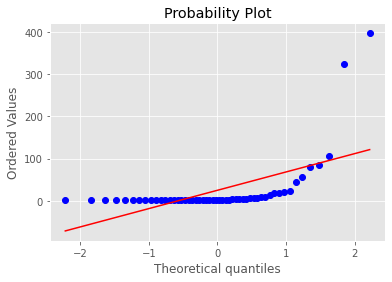

In [32]:
# QQ-plot for Version `Services`
import scipy.stats as stats
stats.probplot(df_filter.No_clicks[df_filter['Version'] \
                                   == 'Services'], dist="norm", plot=plt)
plt.show()

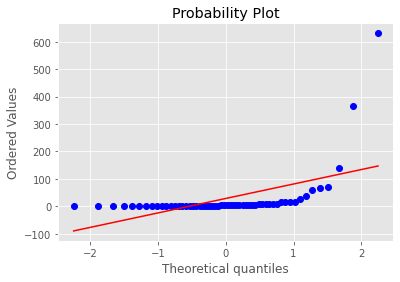

In [33]:
# QQ-plot for Version `Help`
import scipy.stats as stats
stats.probplot(df_filter.No_clicks[df_filter['Version'] \
                                   == 'Help'], dist="norm", plot=plt)
plt.show()

In [45]:
# Shapiro Test for Services
shapiro_test = scipy.stats.shapiro(sample2_services['No_clicks'])
matrix_twosample = [
    ['', 'shapiro_test', 'p-value'],
    ['Sample Data', shapiro_test[0], shapiro_test[1]]
]
twosample_table = ct(matrix_twosample, index=True)
twosample_table

In [48]:
# Shapiro Test for Help
shapiro_test = scipy.stats.shapiro(sample2_help['No_clicks'])
matrix_twosample = [
    ['', 'shapiro_test', 'p-value'],
    ['Sample Data', shapiro_test[0], shapiro_test[1]]
]
twosample_table = ct(matrix_twosample, index=True)
twosample_table

<font color='red'> **Answer:**

**1.3 Read about Multiple comparison problem read ([wikipedia](https://en.wikipedia.org/wiki/Multiple_comparisons_problem), [An Overview of Methods to Address the Multiple Comparison Problem](https://towardsdatascience.com/an-overview-of-methods-to-address-the-multiple-comparison-problem-310427b3ba92) or other resources). What is the problem and when we need to do something about it (describe briefly)? (0.5 points)**

<font color='red'> **Answer:** </font>

The problem:
- Any time we reject a null hypothesis because a P value is less than our critical value, it's possible that we're wrong
- The null hypothesis might really be true, and our significant result might be due to chance

When we need to do something about it?
- when a single false positive in a set of tests would be a problem and the we can applying The the Bonferroni correction

[Reference](http://www.biostathandbook.com/multiplecomparisons.html)

**1.4 Load the dataset classifier_results.csv. The dataset contains the following fields:** 

**Dataset** - 200 datasets retreived from [OpenML](https://www.openml.org/search?type=data) dataset directory.

**Classifier** - 9 classifiers from scikit-learn

**Accuracy** - The accuracy achieved after applying the classifier to the dataset


**Is there a significant statistical difference between these classifiers ? If you were asked to continue your analysis with only a limited number of classifiers how many would you pick and why ? (0.5 points)** (Hint:You can use the orange package that was introduced in the practice session) 

In [3]:
# Practice Lab 09
df_classifier = pd.read_csv('classifier_results.csv')
df_classifier.head()

,Dataset,Classifier,Accuracy
0,dataset_53_heart-statlog.csv,KNeighborsClassifier,0.777778
1,dataset_53_heart-statlog.csv,GaussianProcessClassifier,0.481481
2,dataset_53_heart-statlog.csv,DecisionTreeClassifier,0.796296
3,dataset_53_heart-statlog.csv,RandomForestClassifier,0.796296
4,dataset_53_heart-statlog.csv,AdaBoostClassifier,0.777778


In [1]:
# Author: Hassan Ismail Fawaz <hassan.ismail-fawaz@uha.fr>
#         Germain Forestier <germain.forestier@uha.fr>
#         Jonathan Weber <jonathan.weber@uha.fr>
#         Lhassane Idoumghar <lhassane.idoumghar@uha.fr>
#         Pierre-Alain Muller <pierre-alain.muller@uha.fr>
# License: GPL3

# https://github.com/hfawaz/cd-diagram

import numpy as np
import pandas as pd
import matplotlib

matplotlib.use('agg')
import matplotlib.pyplot as plt

matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = 'Arial'

import operator
import math
from scipy.stats import wilcoxon
from scipy.stats import friedmanchisquare
import networkx

# inspired from orange3 https://docs.orange.biolab.si/3/data-mining-library/reference/evaluation.cd.html
def graph_ranks(avranks, names, p_values, cd=None, cdmethod=None, lowv=None, highv=None,
                width=6, textspace=1, reverse=False, filename=None, **kwargs):
    """
    Draws a CD graph, which is used to display  the differences in methods'
    performance. See Janez Demsar, Statistical Comparisons of Classifiers over
    Multiple Data Sets, 7(Jan):1--30, 2006.

    Needs matplotlib to work.

    The image is ploted on `plt` imported using
    `import matplotlib.pyplot as plt`.

    Args:
        avranks (list of float): average ranks of methods.
        names (list of str): names of methods.
        cd (float): Critical difference used for statistically significance of
            difference between methods.
        cdmethod (int, optional): the method that is compared with other methods
            If omitted, show pairwise comparison of methods
        lowv (int, optional): the lowest shown rank
        highv (int, optional): the highest shown rank
        width (int, optional): default width in inches (default: 6)
        textspace (int, optional): space on figure sides (in inches) for the
            method names (default: 1)
        reverse (bool, optional):  if set to `True`, the lowest rank is on the
            right (default: `False`)
        filename (str, optional): output file name (with extension). If not
            given, the function does not write a file.
    """
    try:
        import matplotlib
        import matplotlib.pyplot as plt
        from matplotlib.backends.backend_agg import FigureCanvasAgg
    except ImportError:
        raise ImportError("Function graph_ranks requires matplotlib.")

    width = float(width)
    textspace = float(textspace)

    def nth(l, n):
        """
        Returns only nth elemnt in a list.
        """
        n = lloc(l, n)
        return [a[n] for a in l]

    def lloc(l, n):
        """
        List location in list of list structure.
        Enable the use of negative locations:
        -1 is the last element, -2 second last...
        """
        if n < 0:
            return len(l[0]) + n
        else:
            return n

    def mxrange(lr):
        """
        Multiple xranges. Can be used to traverse matrices.
        This function is very slow due to unknown number of
        parameters.

        >>> mxrange([3,5])
        [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]

        >>> mxrange([[3,5,1],[9,0,-3]])
        [(3, 9), (3, 6), (3, 3), (4, 9), (4, 6), (4, 3)]

        """
        if not len(lr):
            yield ()
        else:
            # it can work with single numbers
            index = lr[0]
            if isinstance(index, int):
                index = [index]
            for a in range(*index):
                for b in mxrange(lr[1:]):
                    yield tuple([a] + list(b))

    def print_figure(fig, *args, **kwargs):
        canvas = FigureCanvasAgg(fig)
        canvas.print_figure(*args, **kwargs)

    sums = avranks

    nnames = names
    ssums = sums

    if lowv is None:
        lowv = min(1, int(math.floor(min(ssums))))
    if highv is None:
        highv = max(len(avranks), int(math.ceil(max(ssums))))

    cline = 0.4

    k = len(sums)

    lines = None

    linesblank = 0
    scalewidth = width - 2 * textspace

    def rankpos(rank):
        if not reverse:
            a = rank - lowv
        else:
            a = highv - rank
        return textspace + scalewidth / (highv - lowv) * a

    distanceh = 0.25

    cline += distanceh

    # calculate height needed height of an image
    minnotsignificant = max(2 * 0.2, linesblank)
    height = cline + ((k + 1) / 2) * 0.2 + minnotsignificant

    fig = plt.figure(figsize=(width, height))
    fig.set_facecolor('white')
    ax = fig.add_axes([0, 0, 1, 1])  # reverse y axis
    ax.set_axis_off()

    hf = 1. / height  # height factor
    wf = 1. / width

    def hfl(l):
        return [a * hf for a in l]

    def wfl(l):
        return [a * wf for a in l]

    # Upper left corner is (0,0).
    ax.plot([0, 1], [0, 1], c="w")
    ax.set_xlim(0, 1)
    ax.set_ylim(1, 0)

    def line(l, color='k', **kwargs):
        """
        Input is a list of pairs of points.
        """
        ax.plot(wfl(nth(l, 0)), hfl(nth(l, 1)), color=color, **kwargs)

    def text(x, y, s, *args, **kwargs):
        ax.text(wf * x, hf * y, s, *args, **kwargs)

    line([(textspace, cline), (width - textspace, cline)], linewidth=0.7)

    bigtick = 0.1
    smalltick = 0.05
    linewidth = 2.0
    linewidth_sign = 4.0

    tick = None
    for a in list(np.arange(lowv, highv, 0.5)) + [highv]:
        tick = smalltick
        if a == int(a):
            tick = bigtick
        line([(rankpos(a), cline - tick / 2),
              (rankpos(a), cline)],
             linewidth=0.7)

    for a in range(lowv, highv + 1):
        text(rankpos(a), cline - tick / 2 - 0.05, str(a),
             ha="center", va="bottom", size=16)

    k = len(ssums)

    def filter_names(name):
        return name

    space_between_names = 0.24

    for i in range(math.ceil(k / 2)):
        chei = cline + minnotsignificant + i * space_between_names
        line([(rankpos(ssums[i]), cline),
              (rankpos(ssums[i]), chei),
              (textspace - 0.1, chei)],
             linewidth=linewidth)
        text(textspace - 0.2, chei, filter_names(nnames[i]), ha="right", va="center", size=16)

    for i in range(math.ceil(k / 2), k):
        chei = cline + minnotsignificant + (k - i - 1) * space_between_names
        line([(rankpos(ssums[i]), cline),
              (rankpos(ssums[i]), chei),
              (textspace + scalewidth + 0.1, chei)],
             linewidth=linewidth)
        text(textspace + scalewidth + 0.2, chei, filter_names(nnames[i]),
             ha="left", va="center", size=16)

    # no-significance lines
    def draw_lines(lines, side=0.05, height=0.1):
        start = cline + 0.2

        for l, r in lines:
            line([(rankpos(ssums[l]) - side, start),
                  (rankpos(ssums[r]) + side, start)],
                 linewidth=linewidth_sign)
            start += height
            print('drawing: ', l, r)

    # draw_lines(lines)
    start = cline + 0.2
    side = -0.02
    height = 0.1

    # draw no significant lines
    # get the cliques
    cliques = form_cliques(p_values, nnames)
    i = 1
    achieved_half = False
    print(f"\nnnames:\n{nnames}")
    for clq in cliques:
        if len(clq) == 1:
            continue
        print(clq)
        min_idx = np.array(clq).min()
        max_idx = np.array(clq).max()
        if min_idx >= len(nnames) / 2 and achieved_half == False:
            start = cline + 0.25
            achieved_half = True
        line([(rankpos(ssums[min_idx]) - side, start),
              (rankpos(ssums[max_idx]) + side, start)],
             linewidth=linewidth_sign)
        start += height


def form_cliques(p_values, nnames):
    """
    This method forms the cliques
    """
    # first form the numpy matrix data
    m = len(nnames)
    g_data = np.zeros((m, m), dtype=np.int64)
    for p in p_values:
        if p[3] == False:
            i = np.where(nnames == p[0])[0][0]
            j = np.where(nnames == p[1])[0][0]
            min_i = min(i, j)
            max_j = max(i, j)
            g_data[min_i, max_j] = 1

    g = networkx.Graph(g_data)
    return networkx.find_cliques(g)


def draw_cd_diagram(df_perf=None, alpha=0.05):
    """
    Draws the critical difference diagram given the list of pairwise classifiers that are
    significant or not
    """
    p_values, average_ranks, _ = wilcoxon_holm(df_perf=df_perf, alpha=alpha)

    #print(average_ranks)

#     for p in p_values:
#         print(p)

    graph_ranks(average_ranks.values, average_ranks.keys(), p_values,
                cd=None, reverse=True, width=9, textspace=1.5)

    plt.savefig('cd-diagram.png',bbox_inches='tight')

def wilcoxon_holm(alpha=0.05, df_perf=None):
    """
    Applies the wilcoxon signed rank test between each pair of algorithm and then use Holm
    to reject the null's hypothesis
    """
    print(f"\Classifier:\n{pd.unique(df_perf['Classifier'])}")
    # count the number of tested datasets per classifier
    df_counts = pd.DataFrame({'count': df_perf.groupby(
        ['Classifier']).size()}).reset_index()
    # get the maximum number of tested datasets
    max_nb_datasets = df_counts['count'].max()
    # get the list of classifiers who have been tested on nb_max_datasets
    classifiers = list(df_counts.loc[df_counts['count'] == max_nb_datasets]
                       ['Classifier'])
    # test the null hypothesis using friedman before doing a post-hoc analysis
    friedman_p_value = friedmanchisquare(*(
        np.array(df_perf.loc[df_perf['Classifier'] == c]['Accuracy'])
        for c in classifiers))[1]
    if friedman_p_value >= alpha:
        # then the null hypothesis over the entire classifiers cannot be rejected
        print('the null hypothesis over the entire classifiers cannot be rejected')
    else:
        print('the null hypothesis over the entire classifiers rejected')
          
        exit()
    # get the number of classifiers
    m = len(classifiers)
    # init array that contains the p-values calculated by the Wilcoxon signed rank test
    p_values = []
    # loop through the algorithms to compare pairwise
    for i in range(m - 1):
        # get the name of classifier one
        classifier_1 = classifiers[i]
        # get the performance of classifier one
        perf_1 = np.array(df_perf.loc[df_perf['Classifier'] == classifier_1]['Accuracy']
                          , dtype=np.float64)
        for j in range(i + 1, m):
            # get the name of the second classifier
            classifier_2 = classifiers[j]
            # get the performance of classifier one
            perf_2 = np.array(df_perf.loc[df_perf['Classifier'] == classifier_2]
                              ['Accuracy'], dtype=np.float64)
            # calculate the p_value
            p_value = wilcoxon(perf_1, perf_2, zero_method='pratt')[1]
            # appen to the list
            p_values.append((classifier_1, classifier_2, p_value, False))
    # get the number of hypothesis
    k = len(p_values)
    # sort the list in acsending manner of p-value
    p_values.sort(key=operator.itemgetter(2))

    # loop through the hypothesis
    for i in range(k):
        # correct alpha with holm
        new_alpha = float(alpha / (k - i))
        # test if significant after holm's correction of alpha
        if p_values[i][2] <= new_alpha:
            p_values[i] = (p_values[i][0], p_values[i][1], p_values[i][2], True)
        else:
            # stopclassifiers
            break
    # compute the average ranks to be returned (useful for drawing the cd diagram)
    # sort the dataframe of performances
    sorted_df_perf = df_perf.loc[df_perf['Classifier'].isin(classifiers)]. \
        sort_values(['Classifier', 'Dataset'])
    # get the rank data
    rank_data = np.array(sorted_df_perf['Accuracy']).reshape(m, max_nb_datasets)

    # create the data frame containg the accuracies
    df_ranks = pd.DataFrame(data=rank_data, index=np.sort(classifiers), columns=
    np.unique(sorted_df_perf['Dataset']))

    # number of wins
    dfff = df_ranks.rank(ascending=False)
    
    #print(f"\nnumber of wins:\n{dfff[dfff == 1.0].sum(axis=1)}")

    # average the ranks
    average_ranks = df_ranks.rank(ascending=False).mean(axis=1).sort_values(ascending=False)
    print(f"\naverage_ranks:\n{average_ranks}")
    # return the p-values and the average ranks
    print(f"\np_values:")
    for pp in p_values:
          print(f"{pp}")
#           if friedman_p_value >= alpha:
#             # then the null hypothesis over the entire classifiers cannot be rejected
#             print('the null hypothesis over the entire classifiers cannot be rejected')
            
    return p_values, average_ranks, max_nb_datasets

df_perf = pd.read_csv('classifier_results.csv',index_col=False)

draw_cd_diagram(df_perf=df_perf)

\Classifier:
['KNeighborsClassifier' 'GaussianProcessClassifier'
 'DecisionTreeClassifier' 'RandomForestClassifier' 'AdaBoostClassifier'
 'QuadraticDiscriminantAnalysis' 'GradientBoostingClassifier'
 'LinearDiscriminantAnalysis' 'LogisticRegression']
the null hypothesis over the entire classifiers rejected

average_ranks:
GaussianProcessClassifier        6.157895
QuadraticDiscriminantAnalysis    6.078947
GradientBoostingClassifier       4.947368
RandomForestClassifier           4.552632
LinearDiscriminantAnalysis       4.184211
DecisionTreeClassifier           4.184211
AdaBoostClassifier               3.052632
LogisticRegression               2.842105
dtype: float64

p_values:
('GaussianProcessClassifier', 'LogisticRegression', 0.0003832007166730192, True)
('AdaBoostClassifier', 'GaussianProcessClassifier', 0.0005727638496021321, True)
('LogisticRegression', 'QuadraticDiscriminantAnalysis', 0.0015657471389352482, True)
('AdaBoostClassifier', 'QuadraticDiscriminantAnalysis', 0.002374436

In [2]:
df_perf

,Dataset,Classifier,Accuracy
0,dataset_53_heart-statlog.csv,KNeighborsClassifier,0.777778
1,dataset_53_heart-statlog.csv,GaussianProcessClassifier,0.481481
2,dataset_53_heart-statlog.csv,DecisionTreeClassifier,0.796296
3,dataset_53_heart-statlog.csv,RandomForestClassifier,0.796296
4,dataset_53_heart-statlog.csv,AdaBoostClassifier,0.777778
...,...,...,...
162,pc1.csv,AdaBoostClassifier,0.941441
163,pc1.csv,QuadraticDiscriminantAnalysis,0.927928
164,pc1.csv,GradientBoostingClassifier,0.927928
165,pc1.csv,LinearDiscriminantAnalysis,0.932432


In [5]:
df_perf = df_classifier

# count the number of tested datasets per classifier
df_counts = pd.DataFrame({'count': df_perf.groupby(
        ['Classifier']).size()}).reset_index()

# get the maximum number of tested datasets
max_nb_datasets = df_counts['count'].max()

# get the list of classifiers who have been tested on nb_max_datasets
classifiers = list(df_counts.loc[df_counts['count'] == max_nb_datasets]
                       ['Classifier'])

# get the number of classifiers
m = len(classifiers)

# compute the average ranks to be returned (useful for drawing the cd diagram)
# sort the dataframe of performances
sorted_df_perf = df_perf.loc[df_perf['Classifier'].isin(classifiers)]. \
        sort_values(['Classifier', 'Dataset'])

# get the rank data
rank_data = np.array(sorted_df_perf['Accuracy']).reshape(m, max_nb_datasets)

# create the data frame containg the accuracies
df_ranks = pd.DataFrame(data=rank_data, index=np.sort(classifiers), columns=
                        np.unique(sorted_df_perf['Dataset']))

In [6]:
df_ranks

,dataset_37_diabetes.csv,dataset_53_heart-statlog.csv,dataset_59_ionosphere.csv,irish.csv,nalcatdata_cyyoung9302.csv,nalcatdata_reviewer.csv,openml_phpZNNasq.csv,pc1.csv,phpOJxGL9.csv,phpSOw1Kl.csv,phpSRnbqC.csv,phplVyjYQ.csv,phpn1jVwe.csv,phpoW7Dbi.csv,phpvz1IQW.csv,phpxijhaP.csv,phpy0HwUD.csv,phpysQLwp.csv,wine-quality-red.csv
AdaBoostClassifier,0.818182,0.777778,0.957746,1.00,0.894737,0.447368,1.000000,0.941441,0.735043,0.814815,0.702703,0.761905,0.985695,0.572016,0.952381,0.981757,0.375,0.692308,0.61250
DecisionTreeClassifier,0.805195,0.796296,0.943662,0.99,0.894737,0.434211,0.952381,0.927928,0.666667,0.888889,0.675676,0.666667,0.983460,0.572016,0.952381,0.830405,0.450,0.692308,0.63750
GaussianProcessClassifier,0.616883,0.481481,0.929577,0.84,0.736842,0.434211,1.000000,0.927928,0.623932,0.839506,0.567568,0.571429,0.983907,0.534979,0.857143,0.977027,0.275,0.692308,0.60000
GradientBoostingClassifier,0.785714,0.796296,0.943662,0.93,0.894737,0.434211,1.000000,0.927928,0.700855,0.777778,0.567568,0.714286,0.979437,0.551440,0.928571,0.934459,0.350,0.692308,0.64375
LinearDiscriminantAnalysis,0.824675,0.796296,0.915493,1.00,0.578947,0.434211,0.904762,0.932432,0.683761,0.925926,0.540541,0.666667,0.980778,0.637860,1.000000,0.982432,0.425,0.692308,0.61250
LogisticRegression,0.824675,0.814815,0.929577,1.00,0.842105,0.434211,1.000000,0.932432,0.709402,0.851852,0.594595,0.714286,0.983460,1.000000,0.952381,0.983784,0.425,0.846154,0.63750
QuadraticDiscriminantAnalysis,0.811688,0.777778,0.943662,0.84,0.842105,0.460526,0.523810,0.927928,0.606838,0.790123,0.567568,0.523810,0.976308,0.530864,0.880952,0.982432,0.425,0.615385,0.60000
RandomForestClassifier,0.811688,0.796296,0.957746,1.00,0.789474,0.421053,0.857143,0.927928,0.692308,0.851852,0.594595,0.666667,0.980331,0.596708,0.952381,0.975676,0.450,0.692308,0.60000


In [8]:
# average the ranks
average_ranks = df_ranks.rank(ascending=False).mean(axis=1).sort_values(ascending=False)
list(average_ranks)

[6.157894736842105,
 6.078947368421052,
 4.947368421052632,
 4.552631578947368,
 4.184210526315789,
 4.184210526315789,
 3.0526315789473686,
 2.8421052631578947]

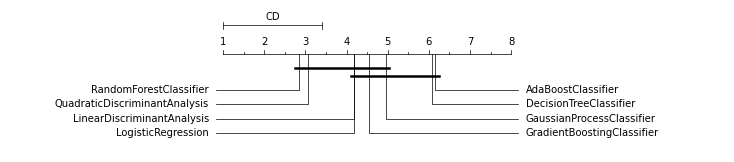

In [16]:
import Orange
import matplotlib.pyplot as plt
names = list(classifiers)
avranks = list(average_ranks)

cd = Orange.evaluation.compute_CD(avranks, max_nb_datasets) #tested on 30 datasets
Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=10, textspace=3)
plt.show()

<font color='red'> **Answer:** </font>

Is there a significant statistical difference between these classifiers ?
**Yes, there is**

If you were asked to continue your analysis with only a limited number of classifiers how many would you pick and why ?
- I would pick two classifiers, AdaBoost and Decision Tree.
- The reason are two-most highest rank classifier and the value close to each other

# 2. Uplift modelling (4 points)

For this task we are going to use email_marketing.csv from [MineThatData](https://blog.minethatdata.com/2008/03/minethatdata-e-mail-analytics-and-data.html). The data was recorded from a two-weeks email campaign that included 64000 customers. Out of this customers:
1. 1/3 were randomly chosen to receive an e-mail campaign featuring Mens merchandise.
2. 1/3 were randomly chosen to receive an e-mail campaign featuring Womens merchandise.
3. 1/3 were randomly chosen to not receive an e-mail campaign.

The features in this dataset include:

- Recency: Months since last purchase.
- History: Actual dollar value spent in the past year.
- Mens: 1/0 indicator, 1 = customer purchased Mens merchandise in the past year.
- Womens: 1/0 indicator, 1 = customer purchased Womens merchandise in the past year.
- Zip_Code: Classifies zip code as Urban, Suburban, or Rural.
- Newbie: 1/0 indicator, 1 = New customer in the past twelve months.
- Channel: Describes the channels the customer purchased from in the past year.
- Segment: e-mail campaign  type that the customer received
- Visit: 1/0 indicator, 1 = Customer visited website in the following two weeks.

The last variable is realted to the evaluation if the campaign was effective or not.

- Conversion: 1/0 indicator, 1 = Customer purchased merchandise in the following two weeks.


In [28]:
# Library needed for task 2
from __future__ import division

from datetime import datetime, timedelta,date
import pandas as pd
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

import chart_studio.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go

import sklearn
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import warnings
warnings.filterwarnings("ignore")

In [29]:
df = pd.read_csv('Kevin_Hillstrom_MineThatData_E-MailAnalytics_DataMiningChallenge_2008.03.20.csv')
df = df.drop(['history_segment'], axis=1) #drop this column as we don't need it
df.head()

,recency,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend
0,10,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0
1,6,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0
2,7,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0.0
3,9,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0.0
4,2,45.34,1,0,Urban,0,Web,Womens E-Mail,0,0,0.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   recency     64000 non-null  int64  
 1   history     64000 non-null  float64
 2   mens        64000 non-null  int64  
 3   womens      64000 non-null  int64  
 4   zip_code    64000 non-null  object 
 5   newbie      64000 non-null  int64  
 6   channel     64000 non-null  object 
 7   segment     64000 non-null  object 
 8   visit       64000 non-null  int64  
 9   conversion  64000 non-null  int64  
 10  spend       64000 non-null  float64
dtypes: float64(2), int64(6), object(3)
memory usage: 5.4+ MB


In [31]:
df.visit.value_counts()

0    54606
1     9394
Name: visit, dtype: int64

**2.0 Use the function calc_uplift() from the practice session to calculate the current uplift of the campaign. Remeber to modify the function according to the need. (0.5 points)**

In [32]:
#function for calculating the uplift
def calc_uplift(df):
    avg_order_value = 25
    
    #calculate conversions for each segment type
    base_conv = df[df.segment == 'No E-Mail']['conversion'].mean()
    mens_conv = df[df.segment == 'Mens E-Mail']['conversion'].mean()
    womens_conv = df[df.segment == 'Womens E-Mail']['conversion'].mean()
    
    #calculate conversion uplift for discount and bogo
    mens_conv_uplift = mens_conv - base_conv   # uplift = treated - contolr
    womens_conv_uplift = womens_conv - base_conv   # uplift = treated - contolr
    
    #calculate order uplift
    mens_order_uplift = mens_conv_uplift * len(df[df.segment == 'Mens E-Mail']['conversion'])
    womens_order_uplift = womens_conv_uplift * len(df[df.segment == 'Womens E-Mail']['conversion'])
    
    #calculate revenue uplift
    mens_rev_uplift = mens_order_uplift * avg_order_value
    womens_rev_uplift = womens_order_uplift * avg_order_value
    
    if len(df[df.segment == 'Mens E-Mail']['conversion']) > 0:
        print(f"Total Targeted Customer Count: {len(df[df.segment == 'Mens E-Mail']['conversion'])}")
        print('Mens E-Mail Conversion Uplift: {0}%'.format(np.round(mens_conv_uplift*100,2))) # uplitf score %
        print('Mens E-Mail Order Uplift: {0}'.format(np.round(mens_order_uplift,2)))
        print('Mens E-Mail Revenue Uplift: ${0}'.format(np.round(mens_rev_uplift,2)))
        print("Revenue Uplift Per Targeted Customer: ${}\n".format(np.round(mens_rev_uplift/len(df[df.segment == 'Mens E-Mail']['conversion']), 2)))
#         print("Revenue Uplift Per Targeted Customer: { } \n}".forma)
    
    if len(df[df.segment == 'Womens E-Mail']['conversion']) > 0:
        print('-------------- \n')
        print(f"Total Targeted Customer Count: { len(df[df.segment == 'Womens E-Mail']['conversion'])}")
        print('Womens E-Mail Conversion Uplift: {0}%'.format(np.round(womens_conv_uplift*100,2))) # uplift sore
        print('Womens E-Mail Order Uplift: {0}'.format(np.round(womens_order_uplift,2)))
        print('Womens E-Mail Revenue Uplift: ${0}'.format(np.round(womens_rev_uplift,2)))
        print("Revenue Uplift Per Targeted Customer: ${}\n".format(np.round(womens_rev_uplift/len(df[df.segment == 'Womens E-Mail']['conversion']), 2)))
    

In [33]:
df2 = pd.read_csv('Kevin_Hillstrom_MineThatData_E-MailAnalytics_DataMiningChallenge_2008.03.20.csv')
df2.head()
calc_uplift(df2)

Total Targeted Customer Count: 21307
Mens E-Mail Conversion Uplift: 0.68%
Mens E-Mail Order Uplift: 144.99
Mens E-Mail Revenue Uplift: $3624.86
Revenue Uplift Per Targeted Customer: $0.17

-------------- 

Total Targeted Customer Count: 21387
Womens E-Mail Conversion Uplift: 0.31%
Womens E-Mail Order Uplift: 66.54
Womens E-Mail Revenue Uplift: $1663.4
Revenue Uplift Per Targeted Customer: $0.08



**2.1 Create a new column named target_class. Split the customers in 4 categories:**

1- Treatment Responders

2- Treatment Non-Responders (sleeping dogs)

3- Control Responders (sure things)

4-Control Non-Responders(lost causes).

**Label encode these categories and store the result for each customer in the column target_class (0.5 points)**

In [34]:
# We need to create four classes for TR, TN, CR, and CN. We know that the customers who received discount and bogo offers are Treatment and the rest is contro
df['campaign_group'] = 'treatment'
df.loc[df.segment == 'No E-Mail', 'campaign_group'] = 'control' # filter for control group
df.head()

,recency,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend,campaign_group
0,10,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0,treatment
1,6,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0,control
2,7,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0.0,treatment
3,9,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0.0,treatment
4,2,45.34,1,0,Urban,0,Web,Womens E-Mail,0,0,0.0,treatment


In [35]:
# Create a target class
df['target_class'] = 0 #CN (Lost Causes)
df.loc[(df.campaign_group == 'control') & (df.conversion > 0),'target_class'] = 1 #CR (Sure Things)
df.loc[(df.campaign_group == 'treatment') & (df.conversion == 0),'target_class'] = 2 #TN (Sleeping Dogs)
df.loc[(df.campaign_group == 'treatment') & (df.conversion > 0),'target_class'] = 3 #TR (Persuadables)
df.head()

,recency,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend,campaign_group,target_class
0,10,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0,treatment,2
1,6,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0,control,0
2,7,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0.0,treatment,2
3,9,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0.0,treatment,2
4,2,45.34,1,0,Urban,0,Web,Womens E-Mail,0,0,0.0,treatment,2


#### target_class information

- 0 -> CN(Control Non-Responders)
- 1 -> CR(Control Responders)
- 2 -> TN(Treatment Non-Responders)
- 3 -> TR(Treatment Responders)
- There is one small feature engineering step before training our model. We will create clusters from history column and apply get_dummies for converting categorical columns into numerical:

In [36]:
df.target_class.value_counts()

2    42238
0    21184
3      456
1      122
Name: target_class, dtype: int64

In [37]:
gr = ['CN', 'CR', "TN", "TR"]
i=0
for d in df.target_class.value_counts():
  print(f"{gr[i]}: {d}\n")
  i+=1

CN: 42238

CR: 21184

TN: 456

TR: 122



In [38]:
gr = ['CN', 'CR', "TN", "TR"]
i=0
for d in df.target_class.value_counts()/len(df) * 100:
  print("{}: {}%\n".format(gr[i], np.round(d, 2)))
#   print(f"{gr[i]}: {d}%\n")
  i+=1

CN: 66.0%

CR: 33.1%

TN: 0.71%

TR: 0.19%



**2.2 Apply the necessary preprocessing to the data and split it into train annd test set using 80/20 ratio. Remember that you have to drop the columns that define the label and perform preprocessing. Build a model with your classifier of choice that will predict probabilities for the categories mentioned in 2.1. (1.5 points)**

In [39]:
#function to order clusters
def order_cluster(cluster_field_name, target_field_name, df, ascending):
    
    new_cluster_field_name = 'new_' + cluster_field_name
    
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    
    df_new['index'] = df_new.index
    
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    
    return df_final

In [40]:
## Model: KNN and Logistic Regression
# create 4 clusters using kmeans based on the history column
kmeans = KMeans(n_clusters=5) # n-1
kmeans.fit(df[['history']]) # value of the historical purchases
df['history_cluster'] = kmeans.predict(df[['history']])
df.head()

,recency,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend,campaign_group,target_class,history_cluster
0,10,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0,treatment,2,0
1,6,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0,control,0,4
2,7,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0.0,treatment,2,4
3,9,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0.0,treatment,2,1
4,2,45.34,1,0,Urban,0,Web,Womens E-Mail,0,0,0.0,treatment,2,0


In [41]:
df['history_cluster'].value_counts()

0    32316
4    17952
2     9083
1     3733
3      916
Name: history_cluster, dtype: int64

In [42]:
df = order_cluster('history_cluster', 'history',df,True)
df.head()

,recency,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend,campaign_group,target_class,history_cluster
0,10,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0,treatment,2,0
1,2,45.34,1,0,Urban,0,Web,Womens E-Mail,0,0,0.0,treatment,2,0
2,6,134.83,0,1,Surburban,0,Phone,Womens E-Mail,1,0,0.0,treatment,2,0
3,9,46.42,0,1,Urban,0,Phone,Womens E-Mail,0,0,0.0,treatment,2,0
4,10,32.84,0,1,Urban,1,Web,Womens E-Mail,0,0,0.0,treatment,2,0


In [43]:
#creating a new dataframe as model and dropping columns that defines the label
df_model = df.drop(['segment','campaign_group','conversion'],axis=1)
#convert categorical columns
df_model = pd.get_dummies(df_model)

df_model.head()

,recency,history,mens,womens,newbie,visit,spend,target_class,history_cluster,zip_code_Rural,zip_code_Surburban,zip_code_Urban,channel_Multichannel,channel_Phone,channel_Web
0,10,142.44,1,0,0,0,0.0,2,0,0,1,0,0,1,0
1,2,45.34,1,0,0,0,0.0,2,0,0,0,1,0,0,1
2,6,134.83,0,1,0,1,0.0,2,0,0,1,0,0,1,0
3,9,46.42,0,1,0,0,0.0,2,0,0,0,1,0,1,0
4,10,32.84,0,1,1,0,0.0,2,0,0,0,1,0,0,1


In [44]:
#create feature set and labels
X = df_model.drop(['target_class'],axis=1)
y = df_model.target_class

#splitting train and test groups
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)

In [45]:
y.value_counts()

2    42238
0    21184
3      456
1      122
Name: target_class, dtype: int64

In [46]:
#fitting the model and predicting the probabilities
xgb_model = xgb.XGBClassifier().fit(X_train, y_train)
class_probs = xgb_model.predict_proba(X_test)

In [47]:
gr = ['CN', 'CR', "TN", "TR"]
i=0
for d in class_probs[0]:
  print("{}: {:f}\n".format(gr[i], d))
#   print(f"{gr[i]}: {d}\n")
  i+=1

CN: 0.295459

CR: 0.000007

TN: 0.704531

TR: 0.000004



**2.3 Calculate the uplift score using probabilities for all customers and store the results to a new column in the dataframe (0.5 points)**

In [48]:
# we use model and result from task 2.2 and call calc_uplift() with previous dataframe with probabilities result

# Calculate uplift score to all customers
#probabilities for all customers
overall_proba = xgb_model.predict_proba(df_model.drop(['target_class'],axis=1))

#assign probabilities to 4 different columns
df_model['proba_CN'] = overall_proba[:,0] 
df_model['proba_CR'] = overall_proba[:,1] 
df_model['proba_TN'] = overall_proba[:,2] 
df_model['proba_TR'] = overall_proba[:,3]

#calculate uplift score for all customers
df_model['uplift_score'] = df_model.eval('proba_CN + proba_TR - proba_TN - proba_CR')

#assign it back to main dataframe
df['uplift_score'] = df_model['uplift_score']

In [49]:
df_model.head()

,recency,history,mens,womens,newbie,visit,spend,target_class,history_cluster,zip_code_Rural,zip_code_Surburban,zip_code_Urban,channel_Multichannel,channel_Phone,channel_Web,proba_CN,proba_CR,proba_TN,proba_TR,uplift_score
0,10,142.44,1,0,0,0,0.0,2,0,0,1,0,0,1,0,0.414999,0.000011,0.584985,0.000005,-0.169991
1,2,45.34,1,0,0,0,0.0,2,0,0,0,1,0,0,1,0.366929,0.000005,0.633059,0.000007,-0.266128
2,6,134.83,0,1,0,1,0.0,2,0,0,1,0,0,1,0,0.262187,0.000004,0.737803,0.000006,-0.475615
3,9,46.42,0,1,0,0,0.0,2,0,0,0,1,0,1,0,0.227983,0.000004,0.772005,0.000007,-0.544019
4,10,32.84,0,1,1,0,0.0,2,0,0,0,1,0,0,1,0.348581,0.000003,0.651406,0.000010,-0.302819


In [50]:
df.head()

,recency,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend,campaign_group,target_class,history_cluster,uplift_score
0,10,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0,treatment,2,0,-0.169991
1,2,45.34,1,0,Urban,0,Web,Womens E-Mail,0,0,0.0,treatment,2,0,-0.266128
2,6,134.83,0,1,Surburban,0,Phone,Womens E-Mail,1,0,0.0,treatment,2,0,-0.475615
3,9,46.42,0,1,Urban,0,Phone,Womens E-Mail,0,0,0.0,treatment,2,0,-0.544019
4,10,32.84,0,1,Urban,1,Web,Womens E-Mail,0,0,0.0,treatment,2,0,-0.302819


**2.4  Select the customers with High Uplift Score as below:**
    
**High Uplift Score:** Customers have uplift score > 3rd quantile

**a. Calculate the ratio of the customers targeted with Womens e-mail that have high uplift score over the total customers who received emails feaaturing Womens merchandise.**

**b. Calculate the ratio of the customers targeted with Mens e-mail that have high uplift score over the total customers who received emails feaaturing Mens merchandise.**


**c.Which one of the campaigns would you say is more successful ? (0.5 points)**

In [51]:
# Calculate uplift score to the generated data using XGBoost Model
df_lift = df.copy()
uplift_q_75 = df_lift.uplift_score.quantile(0.75)

In [52]:
df_lift.segment.value_counts()

Womens E-Mail    21387
Mens E-Mail      21307
No E-Mail        21306
Name: segment, dtype: int64

In [53]:
# task 2.4.a
df_target_cust = df_lift[(df_lift.segment == 'Womens E-Mail') & (df_lift.uplift_score > uplift_q_75)].reset_index(drop=True)
target_cust = len(df_target_cust)
total_cust = df_lift[df_lift.segment == 'Womens E-Mail'].segment.count()
ratio = target_cust / total_cust
print("Ratio of the customers targeted with Womens e-mail = {}%".format(np.round(ratio*100, 2)))

Ratio of the customers targeted with Womens e-mail = 19.18%


In [54]:
# task 2.4.b
df_target_cust = df_lift[(df_lift.segment == 'Mens E-Mail') & (df_lift.uplift_score > uplift_q_75)].reset_index(drop=True)
target_cust = len(df_target_cust)
total_cust = df_lift[df_lift.segment == 'Mens E-Mail'].segment.count()
ratio = target_cust / total_cust
print("Ratio of the customers targeted with Mens e-mail = {}%".format(np.round(ratio*100, 2)))

Ratio of the customers targeted with Mens e-mail = 19.24%


<font color='red'> **Answer:** </font>
- Because ratio for mens email is higher than womens email, we would say targeting mens email will be more succesful


**2.5 For customers in the segment named "Womens e-mail" with high uplift score calculate conversion uplift and revenue uplift. Compare it with the benchmark from excercise 2.0 and draw conclusions. (0.5 points)**

In [55]:
# Benchmark from task 2.0
print("====BENCHMARK from task 2.0=====")
calc_uplift(df2)

====BENCHMARK from task 2.0=====
Total Targeted Customer Count: 21307
Mens E-Mail Conversion Uplift: 0.68%
Mens E-Mail Order Uplift: 144.99
Mens E-Mail Revenue Uplift: $3624.86
Revenue Uplift Per Targeted Customer: $0.17

-------------- 

Total Targeted Customer Count: 21387
Womens E-Mail Conversion Uplift: 0.31%
Womens E-Mail Order Uplift: 66.54
Womens E-Mail Revenue Uplift: $1663.4
Revenue Uplift Per Targeted Customer: $0.08



In [56]:
df_lift_womens = df_lift[(df_lift.segment != 'Mens E-Mail') & (df_lift.uplift_score > uplift_q_75)].reset_index(drop=True)
calc_uplift(df_lift_womens)

-------------- 

Total Targeted Customer Count: 4103
Womens E-Mail Conversion Uplift: 4.21%
Womens E-Mail Order Uplift: 172.74
Womens E-Mail Revenue Uplift: $4318.44
Revenue Uplift Per Targeted Customer: $1.05



//TODO
<font color='red'> **Answer:** </font>

-  The results is giving great rising performance. Revenue uplift per targeted customer is getting 13x better and //we can easily see that 20% of the target group is contributing to 40% of the revenue uplift.//
- By using this model, we can easily make our campaign more efficient by:
    - Targeting specific segments based on the uplift score
    - Trying different offers based on customer’s uplift score

[Reference](https://towardsdatascience.com/uplift-modeling-e38f96b1ef60)

In [57]:
# Extra work - calculation for mens e-mail
df_lift_mens = df_lift[(df_lift.segment != 'Womens E-Mail') & (df_lift.uplift_score > uplift_q_75)].reset_index(drop=True)
calc_uplift(df_lift_mens)

Total Targeted Customer Count: 4100
Mens E-Mail Conversion Uplift: 6.12%
Mens E-Mail Order Uplift: 250.75
Mens E-Mail Revenue Uplift: $6268.71
Revenue Uplift Per Targeted Customer: $1.53



## How long did it take you to solve the homework?

* Please answer as precisely as you can. It does not affect your points or grade in any way. It is okay, if it took 0.5 hours or 24 hours. The collected information will be used to improve future homeworks.

<font color='red'> **Answer:**</font>

**<font color='red'>(please change X in the next cell into your estimate)</font>**

X hours

## What is the level of difficulty for this homework?
you can put only number between $0:10$ ($0:$ easy, $10:$ difficult)

<font color='red'> **Answer:**</font>

        
        